# Exploratory Data Analysis 

In this notebook, we explore closing price data for our assets from Jan 2018 - present time. 

Tech Assets: MSFT, META, AMZN, NVDA, AAPL
Index: SPY (S&P 500 ETF)
Defensive Assets: TLT (bonds), GLD (gold)

The goal is to understand returns, risk and correlations before applying portfolio optimization. 

### Reading the Data

We read daily adjusted closing prices into a DataFrame with 'Date' as the index. 
Each column corresponds to one asset, giving us the raw input for our analysis.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

prices = pd.read_csv("../data/combined_prices.csv",   index_col="Date", parse_dates=True) 
prices.head()

,AAPL,MSFT,AMZN,META,NVDA,SPY,TLT,GLD
Date,,,,,,,,
2018-01-02,40.380993,79.198349,59.450500,180.430130,4.929085,238.568756,102.044449,125.150002
2018-01-03,40.373966,79.566917,60.209999,183.662415,5.253488,240.077713,102.532341,124.820000
2018-01-04,40.561497,80.267189,60.479500,183.324280,5.281180,241.089584,102.516129,125.459999
2018-01-05,41.023304,81.262367,61.457001,185.830536,5.325934,242.696228,102.223396,125.330002
2018-01-08,40.870937,81.345284,62.343498,187.252716,5.489125,243.139999,102.158287,125.309998


### Summary Statistics

The table below shows the range of prices for each asset since 2018. 
- We can clearly see that Tech stocks such as AAPL and NVDA have seen strong appreciation in absolute price. 
- Bonds and Gold on the other hand remain in tighter price ranges. 

In [6]:
prices.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,1928.0,130.172712,62.690003,33.832436,62.633054,140.345734,176.228622,258.103729
MSFT,1928.0,254.420665,118.497601,78.332184,142.140438,246.850876,332.308594,534.760925
AMZN,1928.0,136.488927,44.164174,59.450500,94.094875,135.360001,169.979000,242.059998
META,1928.0,298.686380,161.060759,88.424896,180.464962,240.570221,344.606949,790.000000
NVDA,1928.0,38.436829,46.632715,3.150920,6.296679,16.498219,45.577518,183.160004
SPY,1928.0,384.401807,113.716110,206.683228,273.263062,383.844894,443.002831,648.919983
TLT,1928.0,106.296829,18.635122,76.477158,90.235468,99.894455,121.868427,148.071335
GLD,1928.0,176.057054,47.474838,111.099998,142.017502,169.580002,185.060001,328.140015


### Price Trends

This plot shows raw price levels over rtime.
- Stocks generally trend upward, especially post-2020. 
- Bonds and gold appear relatively flat compared to equities.
- Absolute prices aren't direcrly comparable. For example, AAPL started lower than SPY, which is why we also look at normalized growth for a better comparison.

Text(0.5, 0, 'Year')

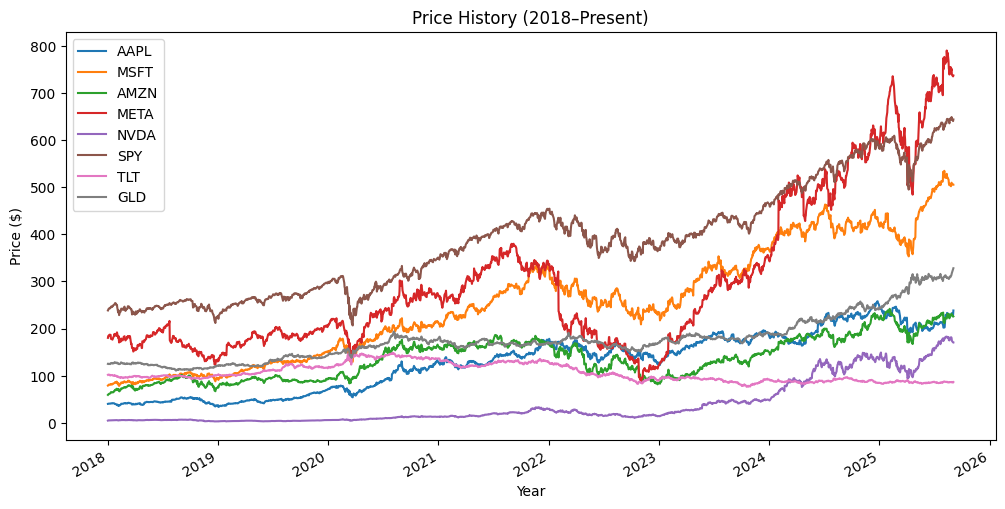

In [7]:
prices.plot(figsize=(12,6), title="Price History (2018–Present)")
plt.ylabel("Price ($)")
plt.xlabel("Year")

### Normalized Growth

By scaling all prices to 1.0 at the start of our timeframe, we can compare relative performance:
- NVDA shows the strongest growth, increasing several times over.
- SPY roughly doubled, representing broad market performance. 
- Bonds and gold show minimal growth, consistent with their defensive roles.

Text(0.5, 0, 'Year')

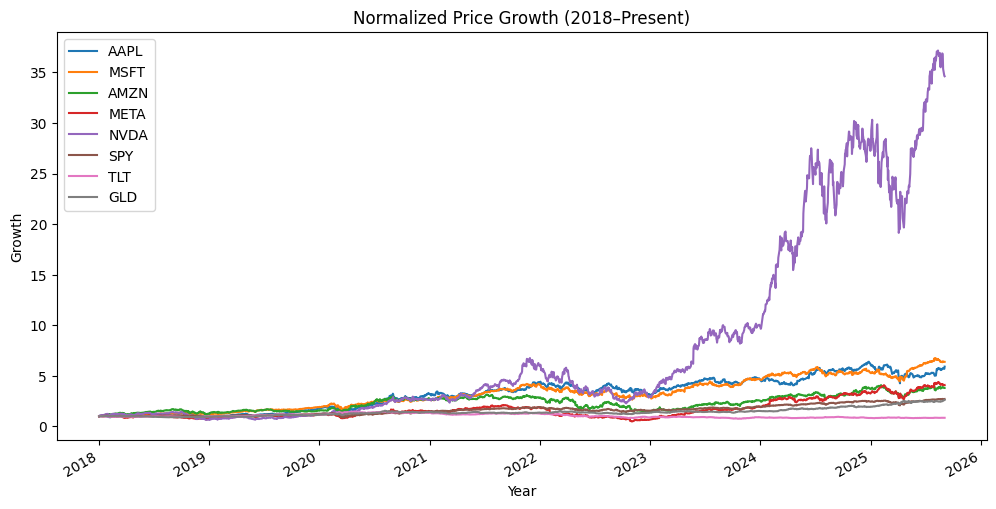

In [8]:

normalized = prices / prices.iloc[0]
normalized.plot(figsize=(12,6), title="Normalized Price Growth (2018–Present)")
plt.ylabel("Growth")
plt.xlabel("Year")


### Daily Returns

We compute daily percentage changes in price (returns).
- Most daily returns fall in the range -5% to +5%
- These returns (not raw prices) are the input for portfolio optimization and hence why we need a new csv to save them.

In [9]:
returns = prices.pct_change().dropna()
returns.to_csv("../data/combined_returns.csv")
returns.head()

,AAPL,MSFT,AMZN,META,NVDA,SPY,TLT,GLD
Date,,,,,,,,
2018-01-03,-0.000174,0.004654,0.012775,0.017914,0.065814,0.006325,0.004781,-0.002637
2018-01-04,0.004645,0.008801,0.004476,-0.001841,0.005271,0.004215,-0.000158,0.005127
2018-01-05,0.011385,0.012398,0.016163,0.013671,0.008474,0.006664,-0.002855,-0.001036
2018-01-08,-0.003714,0.001020,0.014425,0.007653,0.030641,0.001829,-0.000637,-0.000160
2018-01-09,-0.000115,-0.000679,0.004676,-0.002178,-0.000271,0.002264,-0.013373,-0.004628


### Return Statistics

The table below shwos mean and standard deviation of daily returns. 
- Means are small on a daily scale, but compound over time.
- Standard deviation reflects volatility and as we know, tech stocks are comparatively more volatile.

In [10]:
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,1927.0,0.001115,0.019641,-0.128647,-0.008124,0.001187,0.011239,0.153289
MSFT,1927.0,0.001125,0.018080,-0.147390,-0.007387,0.001203,0.010485,0.142169
AMZN,1927.0,0.000930,0.021754,-0.140494,-0.010168,0.001084,0.012262,0.135359
META,1927.0,0.001082,0.026366,-0.263901,-0.011022,0.001112,0.013569,0.232824
NVDA,1927.0,0.002374,0.032671,-0.187558,-0.015133,0.002839,0.019901,0.243696
SPY,1927.0,0.000593,0.012430,-0.109424,-0.004381,0.000788,0.006618,0.105019
TLT,1927.0,-0.000035,0.010067,-0.066684,-0.006233,0.000139,0.005825,0.075195
GLD,1927.0,0.000543,0.009282,-0.053694,-0.004453,0.000570,0.005595,0.048530


### Correlation Heatmap

This heatmap shows how assets move together (correlation of daily returns):
- SPY is highly correlated with tech stocks.
- GLD and TLT have low or negative correlation with equities, making them useful diversifiers. 
- Within tech, correlations are strong, meaning they often rise and fall together.

Text(0.5, 1.0, 'Correlation of Daily Returns')

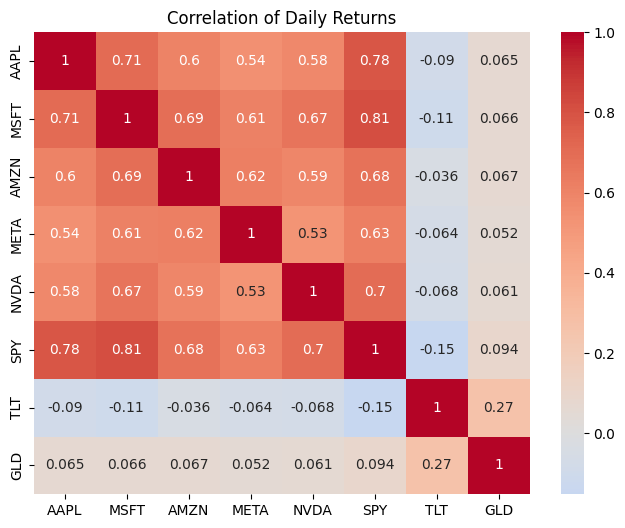

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Daily Returns")

### Volatility Comparison

Annualized volatility shows the riskiness of each asset:
- NVDA and META are the most volatile (highest risk)
- Bonds (TLT) are the least volatile due to their defensive attribute.
- SPY has lower volatility than individual tech stocks but higher than bonds, reflecting its diversified nature.

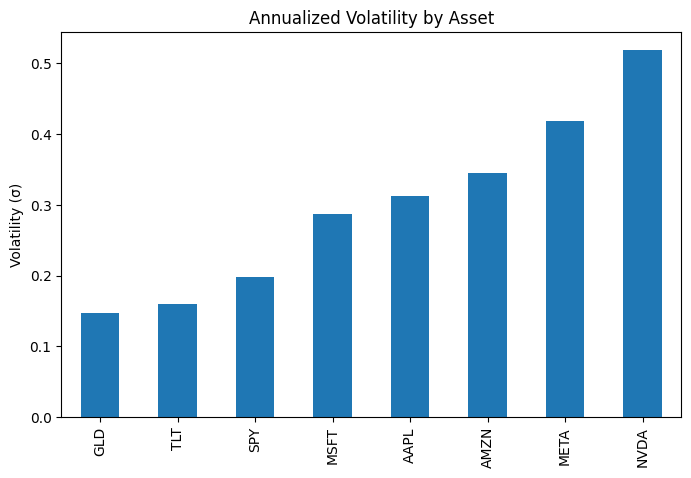

In [12]:
TRADING_DAYS = 252 # trading is only open on weekdays.
annualized_vol = returns.std() * np.sqrt(TRADING_DAYS)

annualized_vol.sort_values().plot.bar(figsize=(8,5))
plt.title("Annualized Volatility by Asset")
plt.ylabel("Volatility (σ)")
plt.show()


### Annualized Returns and Covariance

We compute annualized expected returns and the covariance matrix:
- Annualized (μ) returns are the target for optimization.
- Covariance (Σ) captures how assets move together and is a key input for portfolio risk.

In [13]:
mu_annual = (1 + returns.mean())**TRADING_DAYS - 1
cov_annual = returns.cov() * TRADING_DAYS

mu_annual.to_csv("../data/annualized_mean_returns.csv")
cov_annual.to_csv("../data/annualized_cov_matrix.csv")

mu_annual

AAPL    0.324056
MSFT    0.327716
AMZN    0.263843
META    0.313301
NVDA    0.817466
SPY     0.161039
TLT    -0.008714
GLD     0.146720
dtype: float64

## Finance Glossary

- Return: The percentage change in price from one period to the next
- Volatility (σ): A measure of how much returns fluctuate, usually the standard deviation of returns.
- Covariance Matrix (Σ): A table showing how all assets in the portfolio move with each other, used in portfolio math to calculate overall risk.
- Sharpe Ratio: Return per unit of risk (higher = more efficient portfolio)
- Drawdown: The peak-to-trough decline of a portfolio.